# DATOS ABIERTOS DE LA CIUDAD DE MÉXICO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For plotting
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
carpetas = pd.read_csv('carpetas_completa_abril_2021.csv')

/Users/anieto/miniconda3/envs/zsessions/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN


#### ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?

In [5]:
carpetas.shape

(1208358, 19)

In [6]:
carpetas['fecha_inicio'] = pd.to_datetime(carpetas['fecha_inicio'])
carpetas['fecha_hechos'] = pd.to_datetime(carpetas['fecha_hechos'])

In [7]:
carpetas['mes_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.month
carpetas['anio_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.year

In [8]:
carpetas['fecha_inicio'].min()

Timestamp('2016-01-01 01:35:06')

In [9]:
carpetas['fecha_inicio'].max()

Timestamp('2021-04-30 23:58:49')

In [10]:
carpetas.delito.nunique()

341

Tenemos 1,208,358 delitos registrados de los cuales 341 son diferentes entre el 1 de enero de 2016 y el 30 de abril de 2021.

#### ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [11]:
import seaborn as sns
sns.set(rc={"figure.figsize":(8, 10)})

In [12]:
carpetas.groupby('delito')['delito'].count().sort_values(ascending=False).head()

delito
VIOLENCIA FAMILIAR              122800
FRAUDE                           73743
ROBO DE OBJETOS                  70808
ROBO A NEGOCIO SIN VIOLENCIA     66177
AMENAZAS                         64353
Name: delito, dtype: int64

In [13]:
c = carpetas.groupby('delito')['delito'].count().sort_values(ascending=False).head(10)

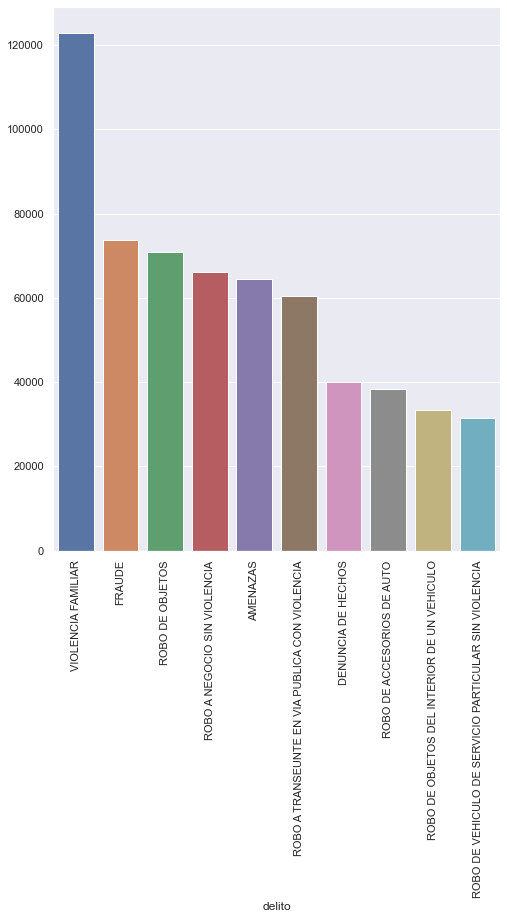

In [15]:
sns.barplot(x=c.index, y=c.values)
plt.xticks(rotation=90)
plt.show()

La variable "delito" es categorica con 341 clases de delitos. Su distribución se puede ordenar para mostrar los delitos más frecuentes.

Estos son:

1. VIOLENCIA FAMILIAR  con            122800 registros
2. FRAUDE                           con 73743 registros
3. ROBO DE OBJETOS                  con 70808 registros
4. ROBO A NEGOCIO SIN VIOLENCIA     con 66177 registros
5. AMENAZAS                         con 64353 registros

#### Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten cuidado con los delitos con pocas ocurrencias).

In [16]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0


In [17]:
# Tomando ao_inicio como el año del registro de la carpeta de investigación.

carpetas.ao_inicio.max()

2021

In [18]:
carpetas[carpetas.ao_inicio == 2021].groupby(['mes_inicio',
                                              'delito'])[['unidad_investigacion']].count().sort_values(by=['mes_inicio',
                                                                                                           'unidad_investigacion'],
                                                                                                       ascending=False).reset_index().head()

,mes_inicio,delito,unidad_investigacion
0,Marzo,VIOLENCIA FAMILIAR,3323
1,Marzo,FRAUDE,1634
2,Marzo,AMENAZAS,1623
3,Marzo,ROBO DE OBJETOS,980
4,Marzo,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,760


In [19]:
df = carpetas[carpetas.ao_inicio == 2021].groupby(['mes_carpeta',
                                              'delito'])[['unidad_investigacion']].count().sort_values(by=['delito',
                                                                                                           'mes_carpeta'], 
                                                                                                       ascending=True).reset_index()
df.rename(columns={'unidad_investigacion':'num_delitos'}, inplace=True)

In [20]:
df.head()

,mes_carpeta,delito,num_delitos
0,1.0,ABORTO,8
1,2.0,ABORTO,7
2,3.0,ABORTO,3
3,4.0,ABORTO,7
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150


In [21]:
df['delta'] = df.groupby(['delito'])['num_delitos'].diff().fillna(0)

In [22]:
df.head()

,mes_carpeta,delito,num_delitos,delta
0,1.0,ABORTO,8,0.0
1,2.0,ABORTO,7,-1.0
2,3.0,ABORTO,3,-4.0
3,4.0,ABORTO,7,4.0
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0


In [23]:
df.shape

(884, 4)

In [24]:
#state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
#delitos_pcts = 
df['pct'] = df.groupby(['delito'])['num_delitos'].apply(lambda x:100 * x / float(x.sum()))

In [25]:
df.head()

,mes_carpeta,delito,num_delitos,delta,pct
0,1.0,ABORTO,8,0.0,32.00000
1,2.0,ABORTO,7,-1.0,28.00000
2,3.0,ABORTO,3,-4.0,12.00000
3,4.0,ABORTO,7,4.0,28.00000
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0,22.45509


In [28]:
df['shift1'] = df.groupby('delito')['num_delitos'].shift()

In [29]:
df['incremento'] = df['delta']/df['shift1']*100

In [30]:
df.head()

,mes_carpeta,delito,num_delitos,delta,pct,shift1,incremento
0,1.0,ABORTO,8,0.0,32.00000,NaN,NaN
1,2.0,ABORTO,7,-1.0,28.00000,8.0,-12.500000
2,3.0,ABORTO,3,-4.0,12.00000,7.0,-57.142857
3,4.0,ABORTO,7,4.0,28.00000,3.0,133.333333
4,1.0,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,150,0.0,22.45509,NaN,NaN


In [31]:
df_inc = df[df['mes_carpeta'] == 4].loc[df['incremento']>0,:].reset_index(drop=True)
#df_inc['ponderado'] = df_inc['incremento']*df_inc['pct']/100
df_inc.head()

,mes_carpeta,delito,num_delitos,delta,pct,shift1,incremento
0,4.0,ABORTO,7,4.0,28.000000,3.0,133.333333
1,4.0,ACOSO SEXUAL,149,22.0,33.940774,127.0,17.322835
2,4.0,ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES,2,1.0,18.181818,1.0,100.000000
3,4.0,CONTAMINACIÓN O RESIDUOS,17,7.0,54.838710,10.0,70.000000
4,4.0,CONTRA EL ESTADO CIVIL,2,1.0,66.666667,1.0,100.000000


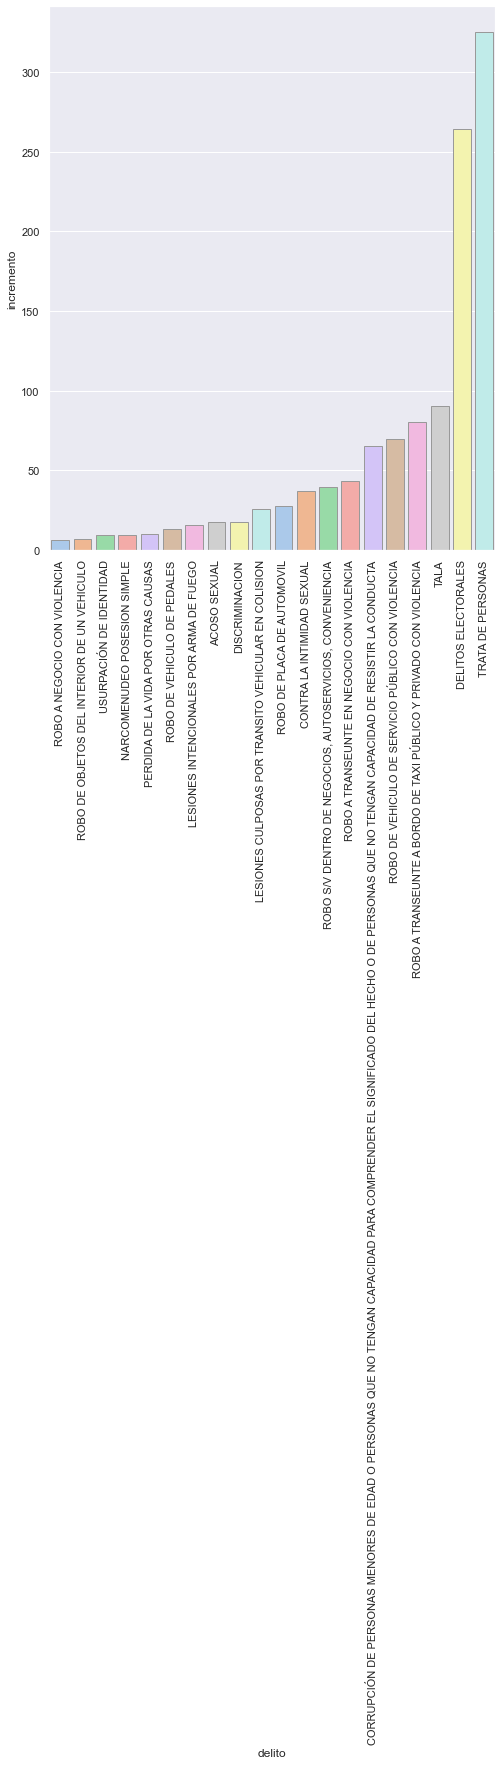

In [32]:
#sns.barplot(x=df_inc.index, y=df_inc.ponderado)
sns.barplot(x="delito", y="incremento", 
            palette="pastel", 
            edgecolor=".6", 
            data=df_inc[df_inc.delta > 10],
            order=df_inc[df_inc.delta > 10].sort_values('incremento').delito
           )
plt.xticks(rotation=90)
plt.show()

En resumen, en 2021, aquellos delitos para los que se abrieron carpeta de investigación y que presentan el mayor incremento porcentual en el último mes registrado y que además hayan incrementado en al menos 10 carpetas son:

1. Trata de personas
2. Delitos Electorales

#### ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?. ¿Por qué crees que sea esto?

In [33]:
carpetas.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN,2.0,2016.0


In [34]:
carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).head(5)

,alcaldia_hechos,delito
140,CUAUHTEMOC,188304
217,IZTAPALAPA,181818
184,GUSTAVO A MADERO,121166
68,BENITO JUAREZ,100539
29,ALVARO OBREGON,82051


In [35]:
carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).tail(5)

,alcaldia_hechos,delito
372,SAN MIGUEL TOTOLAPAN,1
373,SAN MIGUEL XOXTLA,1
375,SAN PABLO DEL MONTE,1
376,SAN PEDRO ATOYAC,1
0,ABALA,1


In [36]:
carpetas.alcaldia_hechos.nunique()

544

In [37]:
cdmx_alc = list(carpetas.groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).head(16)['alcaldia_hechos'])

In [38]:
carpetas[carpetas['alcaldia_hechos'].isin(cdmx_alc)].groupby(['alcaldia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                  ascending=False).tail(5)

,alcaldia_hechos,delito
15,XOCHIMILCO,37878
12,TLAHUAC,29437
9,LA MAGDALENA CONTRERAS,19719
4,CUAJIMALPA DE MORELOS,17813
11,MILPA ALTA,8533


Se tiene que hay 544 alcaldías incluidas y esto incluye las de otros estados diferentes a la CDMX. La alcaldía con mayor número de delitos registrados es *CUAUHTEMOC* y la que tiene menos es *MILPA ALTA* para la CDMX. Claro que hay alcaldías con solo 1 delito registrado. Parece que la desidad de población es un factor importante para el aumento en el registro de los delitos y otro factor puede ser la existencia de ministerios públicos en los cuáles hacer la denuncia.

#### Dentro de cada alcaldía, cuáles son las tres colonias con más delitos

In [39]:
carpetas.shape

(1208358, 21)

In [40]:
544*3

1632

In [41]:
carpetas.colonia_hechos.isnull().sum()

49227

In [42]:
carpetas.colonia_hechos.nunique()

1661

In [43]:
carpetas.alcaldia_hechos.isnull().sum()

3308

In [44]:
carpetas.alcaldia_hechos.nunique()

544

Hay pocas colonias registradas fuera de la CDMX

In [45]:
carpetas.groupby(['alcaldia_hechos','colonia_hechos'])['delito'].count().reset_index().shape

(1860, 3)

In [46]:
# Esto se puede obtener con la estrategia anterior:

df_colonias = carpetas.groupby(['alcaldia_hechos', 
                                'colonia_hechos'])['delito'].count().reset_index().sort_values('delito', 
                                                                                               ascending=False)

In [47]:
df_colonias = df_colonias.sort_values(['alcaldia_hechos','delito'], ascending=False).reset_index(drop=True)

In [48]:
df_colonias.shape

(1860, 3)

In [49]:
df_colonias.groupby(['alcaldia_hechos']).head(3).head()

,alcaldia_hechos,colonia_hechos,delito
0,ZITACUARO,ZITACUARO CENTRO,1
1,XOCHIMILCO,SAN GREGORIO ATLAPULCO,2435
2,XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO,1969
3,XOCHIMILCO,SANTIAGO TEPALCATLALPAN,1927
140,VENUSTIANO CARRANZA,JARDÍN BALBUENA,6520


Removiendo el ultimo "Head" se puede revisar aquellas alcaldías con colonias registradas en las que sucedieros hechos asociados a delitos.

#### ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [50]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0


In [51]:
carpetas['semana_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.week
carpetas['dia_carpeta'] =  pd.to_datetime(carpetas['fecha_inicio']).dt.day
carpetas['anio_mes_carpeta'] = pd.to_datetime(carpetas['fecha_inicio']).dt.to_period('M')

<ipython-input-51-ead8ab3d5ac8>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [52]:
carpetas['anio_sem_carpeta'] = pd.to_datetime(carpetas['fecha_inicio'], format='%d/%b/%y %H:%M %p').dt.strftime('%Y%V')

In [53]:
# Usaremos la fecha de inicio de la carpeta

df = carpetas.groupby('anio_sem_carpeta')['delito'].count().reset_index()
df.head()

,anio_sem_carpeta,delito
0,201601,3184
1,201602,3429
2,201603,3656
3,201604,3709
4,201605,3532


In [63]:
df.tail()

,anio_sem_carpeta,delito
274,202113,4007
275,202114,4644
276,202115,4724
277,202116,4597
278,202117,3741


In [56]:
# 2021, semana 53?!

carpetas[carpetas['anio_sem_carpeta'] == '201653'].sample()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta,semana_carpeta,dia_carpeta,anio_mes_carpeta,anio_sem_carpeta
3379,2015.0,Diciembre,2015-12-30 12:00:00,2016,Enero,2016-01-01 18:22:30,ABUSO SEXUAL,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-2,FDS-2-03,DELITO DE BAJO IMPACTO,MAYAS,NaN,AJUSCO,COYOACAN,NaN,-99.159274,19.328308,NaN,1.0,2016.0,53.0,1.0,2016-01,201653


In [57]:
# corregimos fechas raras de la semana 53

carpetas.loc[carpetas['anio_sem_carpeta'] == '202153', 'anio_sem_carpeta'] = '202053'
# Podemos cambiar el año a que sea 2020 utlima semana pero podríamos modificar el registro real
#carpetas.loc[(carpetas['anio_carpeta'] == '2021')&(carpetas['anio_sem_carpeta'] == '202053'), 'anio_carpeta'] = 2020.0
#
carpetas.loc[carpetas['anio_sem_carpeta'] == '201653', 'anio_sem_carpeta'] = '201600' # Solo queremos que no ponga estos registros justo antes de 2017

In [58]:
df = carpetas.groupby('anio_sem_carpeta')['delito'].count().reset_index()
df.head(2)

,anio_sem_carpeta,delito
0,201600,800
1,201601,3184


<AxesSubplot:xlabel='anio_sem_carpeta'>

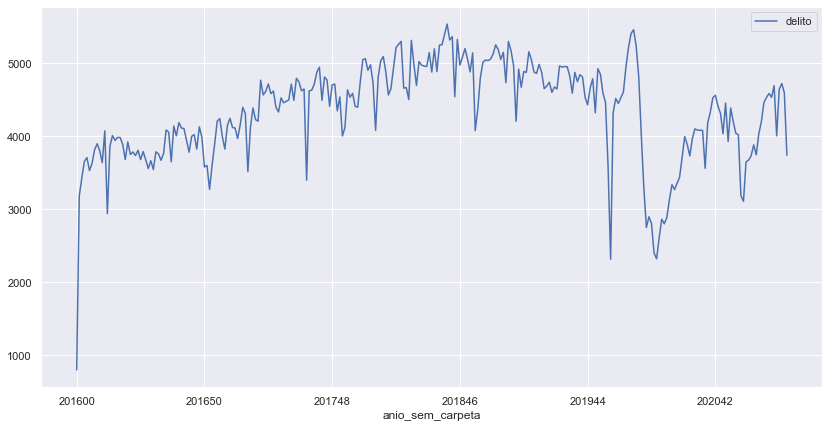

In [59]:
df.plot(x='anio_sem_carpeta',y='delito', figsize=(14,7))

In [60]:
df[df['anio_sem_carpeta']=='202001']

,anio_sem_carpeta,delito
209,202001,2316


In [61]:
carpetas.anio_carpeta.unique()

array([2016., 2017., 2018., 2019., 2020., 2021.,   nan])

In [64]:
carpetas.loc[carpetas['anio_carpeta'].isnull(),:]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta,semana_carpeta,dia_carpeta,anio_mes_carpeta,anio_sem_carpeta
1168285,2020.0,Agosto,2020-08-12 16:45:00,2020,Agosto,NaT,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,GAM-8,UI-2SD,HOMICIDIO DOLOSO,CALLE NORTE 82 A,NaN,GERTRUDIS SÁNCHEZ 2A SECCIÓN,GUSTAVO A MADERO,FUERO COMUN,-99.101234,19.466268,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1168286,2020.0,Octubre,2020-10-01 06:20:00,2020,Octubre,NaT,PLAGIO O SECUESTRO,FISCALÍA DE INVESTIGACIÓN DEL DELITO DE SECUESTRO,E,1 CON DETENIDO 1 C/D,SECUESTRO,SE DESCONOCE,NaN,NaN,AZCAPOTZALCO,FUERO COMUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1168287,2020.0,Octubre,2020-10-26 19:45:00,2020,Octubre,NaT,FEMINICIDIO,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN TLALPAN,TLP-3,UI-2CD,HOMICIDIO DOLOSO,SEGUNDA CERRADA DE TECALTITLA,NaN,LA GUADALUPANA,TLALPAN,FUERO COMUN,-99.149103,19.194419,NaN,NaN,NaN,NaN,NaN,NaT,NaN


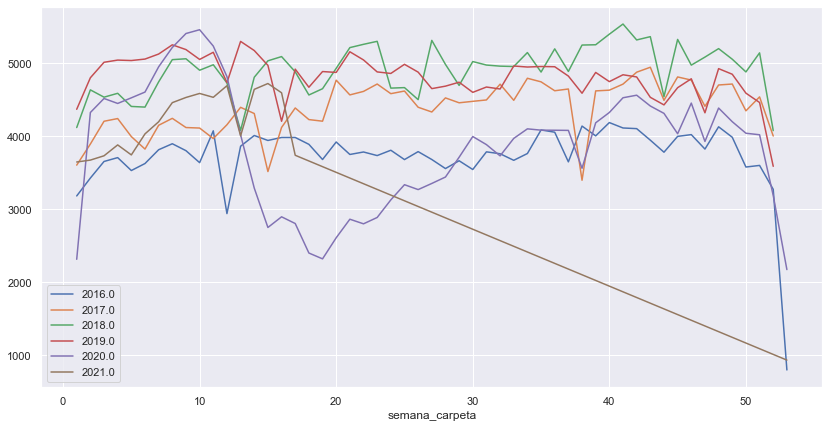

In [62]:
carpetas.groupby(['anio_carpeta',
                  'semana_carpeta'])[['delito']].count().reset_index().set_index('semana_carpeta').groupby('anio_carpeta')['delito'].plot(legend=True,
                                                                                                                                          figsize=(14,7))
plt.show()

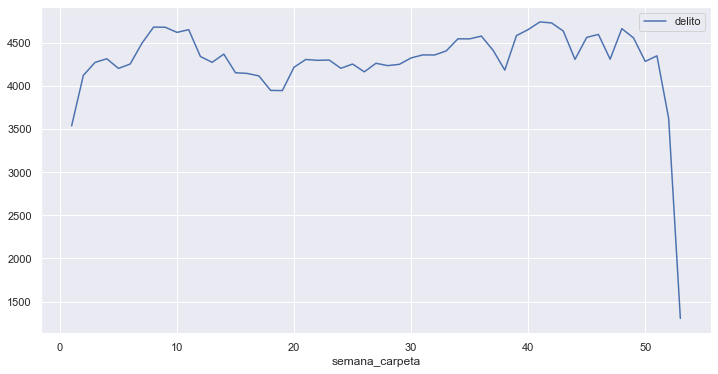

In [68]:
carpetas.groupby(['anio_carpeta',
                  'semana_carpeta'])[['delito']].count().reset_index().set_index('semana_carpeta').groupby('semana_carpeta')['delito'].mean().plot(legend=True,
                                                                                                                                          figsize=(12,6))
plt.show()

In [69]:
df.head(2)

,anio_sem_carpeta,delito
0,201600,800
1,201601,3184


<AxesSubplot:title={'center':'Rollong window tamaño 8 usando promedio'}>

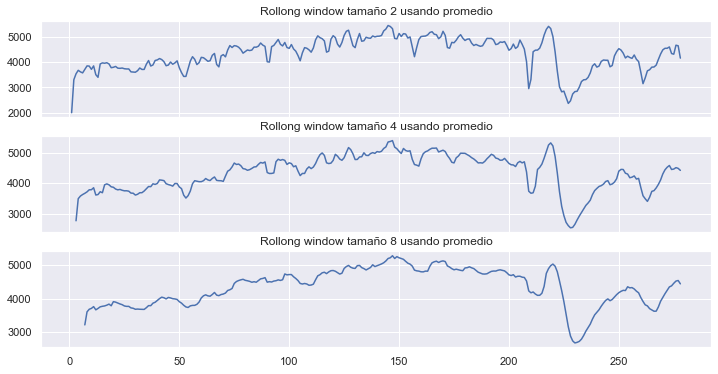

In [82]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(12,6))

df['delito'].rolling(2).mean().plot(ax=ax[0], title="Rollong window tamaño 2 usando promedio", legend=False)

df['delito'].rolling(4).mean().plot(ax=ax[1], title="Rollong window tamaño 4 usando promedio", legend=False)

df['delito'].rolling(8).mean().plot(ax=ax[2], title="Rollong window tamaño 8 usando promedio", legend=False)

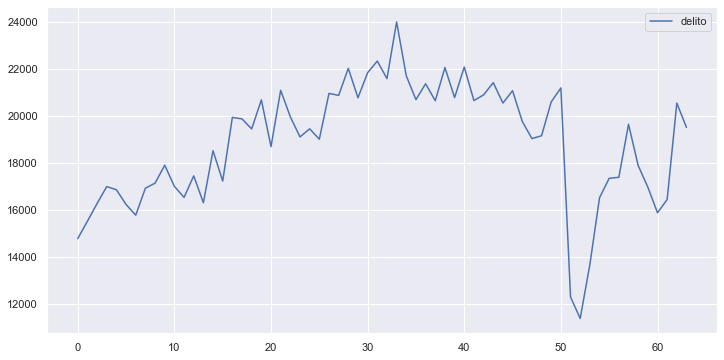

In [84]:
carpetas.groupby(['anio_mes_carpeta'])[['delito']].count().reset_index().plot(legend=True,figsize=(12,6))
plt.show()

1. 2020 en marzo a junio (cierre general de actividades por pandemia) va a jalar hacia abajo el promedio de delitos registrados semanales.
2. Podemos verificar que a inicio de año aumenta el número de delitos investigados.
3. Hacia el segundo semestre (después de la semana 26) se mantiene el nivel promedio y hacia la semana 40 vuelve a aumentar el número de carpetas.
4. También hay un nivel bajo a fin de año posiblemente debido a las fiestas en esa época.

### Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado).

Usaremos carpetas abiertas relacionadas a hechos situados en las alcaldías de la cdmx y los datos del censo del [INEGI](https://www.inegi.org.mx/servicios/datosabiertos.html) de 2020.

In [88]:
ageb = pd.read_csv('ageb_cdmx_2020/conjunto_de_datos/conjunto_de_datos_ageb_urbana_09_cpv2020.csv')

In [89]:
ageb.shape

(68941, 230)

In [92]:
ageb.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,P_12A14_M,P_15A17,P_15A17_F,P_15A17_M,P_18A24,P_18A24_F,P_18A24_M,P_15A49_F,P_60YMAS,P_60YMAS_F,P_60YMAS_M,REL_H_M,POB0_14,POB15_64,POB65_MAS,PROM_HNV,PNACENT,PNACENT_F,PNACENT_M,PNACOE,PNACOE_F,PNACOE_M,PRES2015,PRES2015_F,PRES2015_M,PRESOE15,PRESOE15_F,PRESOE15_M,P3YM_HLI,P3YM_HLI_F,P3YM_HLI_M,P3HLINHE,P3HLINHE_F,P3HLINHE_M,P3HLI_HE,P3HLI_HE_F,P3HLI_HE_M,P5_HLI,P5_HLI_NHE,P5_HLI_HE,PHOG_IND,POB_AFRO,POB_AFRO_F,POB_AFRO_M,PCON_DISC,PCDISC_MOT,PCDISC_VIS,PCDISC_LENG,PCDISC_AUD,PCDISC_MOT2,PCDISC_MEN,PCON_LIMI,PCLIM_CSB,PCLIM_VIS,PCLIM_HACO,PCLIM_OAUD,PCLIM_MOT2,PCLIM_RE_CO,PCLIM_PMEN,PSIND_LIM,P3A5_NOA,P3A5_NOA_F,P3A5_NOA_M,P6A11_NOA,P6A11_NOAF,P6A11_NOAM,P12A14NOA,P12A14NOAF,P12A14NOAM,P15A17A,P15A17A_F,P15A17A_M,P18A24A,P18A24A_F,P18A24A_M,P8A14AN,P8A14AN_F,P8A14AN_M,P15YM_AN,P15YM_AN_F,P15YM_AN_M,P15YM_SE,P15YM_SE_F,P15YM_SE_M,P15PRI_IN,P15PRI_INF,P15PRI_INM,P15PRI_CO,P15PRI_COF,P15PRI_COM,P15SEC_IN,P15SEC_INF,P15SEC_INM,P15SEC_CO,P15SEC_COF,P15SEC_COM,P18YM_PB,P18YM_PB_F,P18YM_PB_M,GRAPROES,GRAPROES_F,GRAPROES_M,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,PSINDER,PDER_SS,PDER_IMSS,PDER_ISTE,PDER_ISTEE,PAFIL_PDOM,PDER_SEGP,PDER_IMSSB,PAFIL_IPRIV,PAFIL_OTRAI,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,PCATOLICA,PRO_CRIEVA,POTRAS_REL,PSIN_RELIG,TOTHOG,HOGJEF_F,HOGJEF_M,POBHOG,PHOGJEF_F,PHOGJEF_M,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_HAB,VIVPARH_CV,TVIVPARHAB,VIVPAR_DES,VIVPAR_UT,OCUPVIVPAR,PROM_OCUP,PRO_OCUP_C,VPH_PISODT,VPH_PISOTI,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la entidad,0000,0,9209944,4805017,4404927,267151,131720,135431,8933167,4668454,4264713,8720414,4563147,4157267,7915499,4167530,3747969,7547545,3985698,3561847,7166737,3798760,3367977,324942,160337,164605,692726,340587,352139,838416,412683,425733,367954,181832,186122,380808,186938,193870,984186,487898,496288,2508606,1491619,853207,638412,91.67,1652773,6525440,1022105,1.65,7404454,3807741,3596713,1679063,934710,744353,8327432,4373027,3954405,308686,160707,147979,125153,66922,58231,1032,674,358,122971,65818,57153,124540,1016,122379,289139,186914,95005,91909,493589,244406,210900,59979,114412,83316,85252,1141218,370714,731537,58899,258902,55719,226966,145428,7489519,90729,44344,46385,31704,15192,16512,23905,10935,12970,307359,154326,153033,446846,224403,222443,11841,5137,6704,107444,73765,33679,162484,96369,66115,277823,171549,106274,686827,399252,287575,195837,87488,108349,1468292,753306,714986,4516388,2341854,2174534,11.48,11.32,11.67,5099957,2316485,2783472,2798579,1843317,955262,4985469,2273939,2711530,114488,42546,71942,2502789,6689012,3881545,1128554,12484,104474,1203824,21158,444160,93084,3017529,3731096,1160556,6988016,668246,55245,1472848,2756319,1098365,1657954,9159392,3408051,5751341,3036239,2757433,2883154,2604348,2752169,2756319,207026,71780,9159392,3.32,0.8,2732051,16199,813453,1935230,136682,314544,2297404,2746872,1917,2719720,2655528,29004,2328798,1665465,2738826,4975,2744306,4207,2715805,175,2738936,1385629,6180,2580111,2279427,1843092,1289361,214550,550349,2165974,2647911,1649403,1898265,2536523,2084156,1290811,957162,568827,46172,77272,561128,10528
1,9,Ciudad de México,2,Azcapotzalco,0,Total del municipio,0000,0,432205,227255,204950,11784,5702,60

In [93]:
cols_crist = {'ENTIDAD':'Clave de entidad federativa',
'NOM_ENT':'Entidad federativa',
'MUN':'Clave de municipio o demarcación territorial',
'NOM_MUN':'Municipio o demarcación territorial',
'LOC':'Clave de localidad',
'NOM_LOC':'Localidad',
'AGEB':'Clave del AGEB',
'MZA':'Clave de manzana',
'POBTOT':'Población total',
'POBFEM':'Población femenina',
'POBMAS':'Población masculina'}

In [94]:
ageb.rename(columns = cols_crist, inplace=True)

In [99]:
ageb = ageb.iloc[:,:11]

In [108]:
ageb.head()

,Clave de entidad federativa,Entidad federativa,Clave de municipio o demarcación territorial,Municipio o demarcación territorial,Clave de localidad,Localidad,Clave del AGEB,Clave de manzana,Población total,Población femenina,Población masculina
0,9,Ciudad de México,0,TOTAL DE LA ENTIDAD CIUDAD DE MÉXICO,0,Total de la entidad,0000,0,9209944,4805017,4404927
1,9,Ciudad de México,2,AZCAPOTZALCO,0,Total del municipio,0000,0,432205,227255,204950
2,9,Ciudad de México,2,AZCAPOTZALCO,1,Total de la localidad urbana,0000,0,432205,227255,204950
3,9,Ciudad de México,2,AZCAPOTZALCO,1,Total AGEB urbana,0010,0,3183,1695,1488
4,9,Ciudad de México,2,AZCAPOTZALCO,1,Azcapotzalco,0010,1,159,86,73


In [106]:
# Vemos que no podremos ligar cada clave de AGEB pues faltan las relacion hacia las colonias (que bien pueden no existir)
ageb[ageb['Municipio o demarcación territorial']=='Coyoacán']['Clave del AGEB'].nunique()

157

In [107]:
ageb['Municipio o demarcación territorial'] = ageb['Municipio o demarcación territorial'].str.upper()

In [119]:
ageb['Municipio o demarcación territorial'].unique()

array(['TOTAL DE LA ENTIDAD CIUDAD DE MEXICO', 'AZCAPOTZALCO', 'COYOACAN',
       'CUAJIMALPA DE MORELOS', 'GUSTAVO A. MADERO', 'IZTACALCO',
       'IZTAPALAPA', 'LA MAGDALENA CONTRERAS', 'MILPA ALTA',
       'ALVARO OBREGON', 'TLAHUAC', 'TLALPAN', 'XOCHIMILCO',
       'BENITO JUAREZ', 'CUAUHTEMOC', 'MIGUEL HIDALGO',
       'VENUSTIANO CARRANZA'], dtype=object)

In [170]:
carpetas.loc[carpetas['alcaldia_hechos']=='GUSTAVO A MADERO','alcaldia_hechos'] = 'GUSTAVO A. MADERO'

In [118]:
# Los datos de INEGI todavía contienen acentos, los removemos pera poder unir con las carpetas:

import unidecode #pip install unidecode
def sin_acentos(p):
    return unidecode.unidecode(p)

ageb['Municipio o demarcación territorial'] = ageb['Municipio o demarcación territorial'].apply(sin_acentos)

In [ ]:
ageb[ageb['Municipio o demarcación territorial'] == 'AZCAPOTZALCO']['Clave de localidad'].unique()

In [153]:
ageb = ageb[['Municipio o demarcación territorial', 'Clave de localidad',
       'Localidad', 'Clave del AGEB', 'Población total',
       'Población femenina', 'Población masculina']]

In [154]:
ageb = ageb.loc[(ageb['Clave de localidad']==0) & (ageb['Clave del AGEB'] == '0000'), :].reset_index(drop=True)

In [156]:
ageb.drop(columns=['Localidad','Clave de localidad','Clave del AGEB'],inplace=True)

In [109]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta,semana_carpeta,dia_carpeta,anio_mes_carpeta,anio_sem_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0,5.0,1.0,2016-02,201605
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0,5.0,1.0,2016-02,201605


In [138]:
carpetas.categoria_delito.unique()

array(['DELITO DE BAJO IMPACTO', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'HECHO NO DELICTIVO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A NEGOCIO CON VIOLENCIA',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'VIOLACIÓN', 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'SECUESTRO', 'PLAGIO O SECUESTRO', 'FEMINICIDIO'], dtype=object)

In [181]:
# Usaré categoría del delito igual a homicidio doloso

#delitos = carpetas[carpetas['categoria_delito'].str.contains("HOMICIDIO")].groupby('alcaldia_hechos')['delito'].count().reset_index()
delitos = carpetas[carpetas['categoria_delito']=="HOMICIDIO DOLOSO"].groupby(['anio_carpeta', 
                                                                              #'anio_sem_carpeta',
                                                                              'alcaldia_hechos'])['delito'].count().reset_index()
delitos.head()

,anio_carpeta,alcaldia_hechos,delito
0,2016.0,ACAPULCO DE JUAREZ,1
1,2016.0,ALVARO OBREGON,64
2,2016.0,AMECAMECA,1
3,2016.0,APASEO EL GRANDE,1
4,2016.0,ATIZAPAN DE ZARAGOZA,1


In [182]:
df = ageb.merge(delitos, left_on='Municipio o demarcación territorial', right_on='alcaldia_hechos')

In [183]:
df.shape

(96, 7)

In [184]:
df.head()

,Municipio o demarcación territorial,Población total,Población femenina,Población masculina,anio_carpeta,alcaldia_hechos,delito
0,AZCAPOTZALCO,432205,227255,204950,2016.0,AZCAPOTZALCO,30
1,AZCAPOTZALCO,432205,227255,204950,2017.0,AZCAPOTZALCO,42
2,AZCAPOTZALCO,432205,227255,204950,2018.0,AZCAPOTZALCO,58
3,AZCAPOTZALCO,432205,227255,204950,2019.0,AZCAPOTZALCO,48
4,AZCAPOTZALCO,432205,227255,204950,2020.0,AZCAPOTZALCO,51


In [185]:
# Consideremos la población en unidades de 100 mil habitantes
df['habs_100'] = df['Población total']/100000

In [186]:
# Tomamos los homicidioso dolosos en la unidad anterior
df['hom_100'] = df['delito']/df['habs_100']

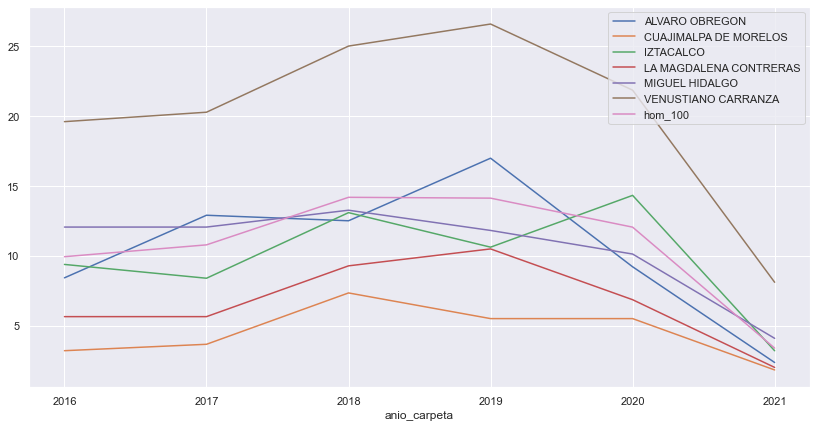

In [202]:
alcaldias = np.random.choice(list(df['alcaldia_hechos']),6)
df[df['alcaldia_hechos'].isin(alcaldias)].set_index('anio_carpeta').groupby('alcaldia_hechos')['hom_100'].plot(legend=True, 
                                                                       figsize=(14,7))
df.groupby('anio_carpeta')['hom_100'].mean().plot(legend=True)
plt.show()

In [199]:
df.head()

,Municipio o demarcación territorial,Población total,Población femenina,Población masculina,anio_carpeta,alcaldia_hechos,delito,habs_100,hom_100
0,AZCAPOTZALCO,432205,227255,204950,2016.0,AZCAPOTZALCO,30,4.32205,6.941151
1,AZCAPOTZALCO,432205,227255,204950,2017.0,AZCAPOTZALCO,42,4.32205,9.717611
2,AZCAPOTZALCO,432205,227255,204950,2018.0,AZCAPOTZALCO,58,4.32205,13.419558
3,AZCAPOTZALCO,432205,227255,204950,2019.0,AZCAPOTZALCO,48,4.32205,11.105841
4,AZCAPOTZALCO,432205,227255,204950,2020.0,AZCAPOTZALCO,51,4.32205,11.799956


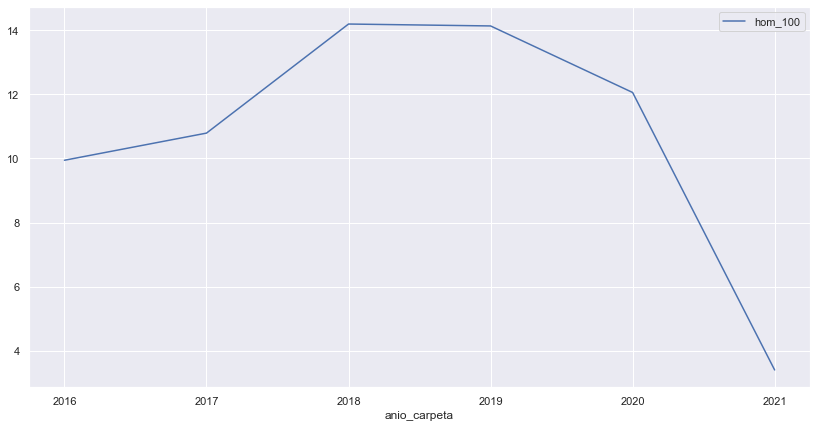

In [200]:
df.groupby('anio_carpeta')['hom_100'].mean().plot(legend=True,figsize=(14,7))
plt.show()

### ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

In [191]:
carpetas.head(2)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,mes_carpeta,anio_carpeta,semana_carpeta,dia_carpeta,anio_mes_carpeta,anio_sem_carpeta
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN,2.0,2016.0,5.0,1.0,2016-02,201605
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN,2.0,2016.0,5.0,1.0,2016-02,201605


In [239]:
carpetas.colonia_hechos.nunique()

1661

In [212]:
carpetas.groupby('categoria_delito')['delito'].count()

categoria_delito
DELITO DE BAJO IMPACTO                                     941573
FEMINICIDIO                                                     2
HECHO NO DELICTIVO                                          56177
HOMICIDIO DOLOSO                                             6975
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                8919
PLAGIO O SECUESTRO                                              1
ROBO A CASA HABITACIÓN CON VIOLENCIA                         3072
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      2284
ROBO A NEGOCIO CON VIOLENCIA                                20034
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      4100
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                1187
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       11060
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       12555
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        68904
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                   

In [234]:
carpetas['Cat_del'] = 'DE_IMPACTO'
carpetas.loc[carpetas['categoria_delito']=='HECHO NO DELICTIVO','Cat_del'] = 'NO_DELICTIVO'
carpetas.loc[carpetas['categoria_delito']=='DELITO DE BAJO IMPACTO','Cat_del'] = 'BAJO_IMPACTO'

In [235]:
carpetas['Cat_del'].value_counts(normalize=True)

BAJO_IMPACTO    0.779217
DE_IMPACTO      0.174293
NO_DELICTIVO    0.046490
Name: Cat_del, dtype: float64

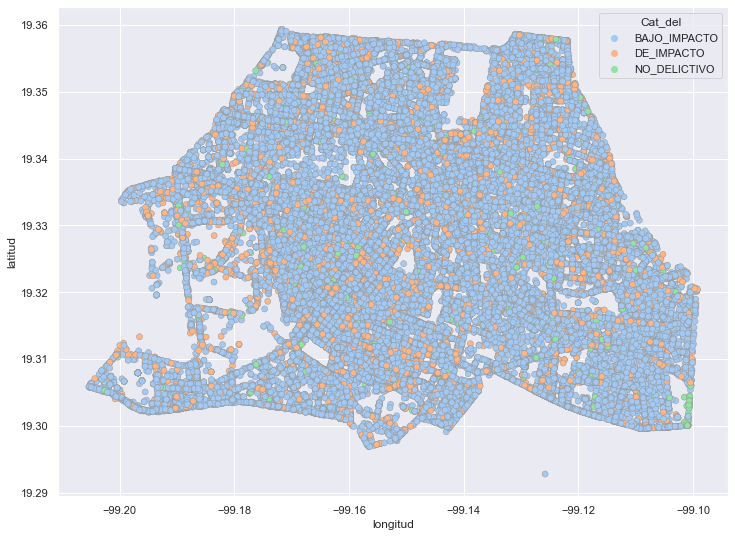

In [236]:
fig, ax = plt.subplots(figsize=(12,9))

sns.scatterplot(x='longitud', y='latitud', 
                palette="pastel", 
                edgecolor=".6", 
                data=carpetas[carpetas['alcaldia_hechos']=='COYOACAN'], hue='Cat_del')
plt.show()

In [233]:
carpetas[carpetas['categoria_delito']=='HECHO NO DELICTIVO']['delito'].unique()

array(['DENUNCIA DE HECHOS', 'PERDIDA DE LA VIDA POR OTRAS CAUSAS',
       'PERDIDA DE LA VIDA POR PRECIPITACION',
       'PERDIDA DE LA VIDA POR PARO CARDIACO',
       'PERDIDA DE LA VIDA POR ENFERMEDAD',
       'PERDIDA DE LA VIDA POR QUEMADURA', 'PERDIDA DE LA VIDA POR CAIDA',
       'PERDIDA DE LA VIDA POR INTOXICACION',
       'PERDIDA DE LA VIDA POR SUICIDIO',
       'PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA',
       'PERDIDA DE LA VIDA POR AHOGAMIENTO',
       'PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS',
       'PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO',
       'PERDIDA DE LA VIDA POR ASFIXIA',
       'PERDIDA DE LA VIDA POR ACCIDENTE LABORAL',
       'PERDIDA DE LA VIDA POR DERRUMBE', 'DDH REDES', 'DDH SIN DATOS',
       'DDH OFICIO COLABORACION', 'DDH FRVT', 'DDH RELACIONADAS',
       'DDH ANONIMAS', 'DDH OTRAS MATERIAS', 'DDH FDS',
       'DDH INCOMPETENCIA', 'DDH CERESO',
       'PERDIDA DE LA VIDA POR ENVENENAMIENTO', 'EXHORTOS',
       'DENUNCIA DE HECHOS P

In [ ]:
df['pct'] = df.groupby(['delito'])['num_delitos'].apply(lambda x:100 * x / float(x.sum()))